Please upload your kenya_population_2019.csv file...


Saving kenya_population_2019_full.csv to kenya_population_2019_full.csv
Dataset Preview:

       County  Total_population    Male  Female   Urban   Rural
0     Mombasa           1208333  601749  606584  513208  695125
1       Kwale            866820  431676  435144  667822  198998
2      Kilifi           1453787  723985  729802  929255  524532
3  Tana River            315943  157339  158604  176673  139270
4        Lamu            143920   71672   72248   42256  101664

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   County            47 non-null     object
 1   Total_population  47 non-null     int64 
 2   Male              47 non-null     int64 
 3   Female            47 non-null     int64 
 4   Urban             47 non-null     int64 
 5   Rural             47 non-null     int64 
dtypes: int64(5), object(1)
memory usage:

/tmp/ipython-input-3038594085.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_population", y="County", data=df_sorted, palette="viridis")


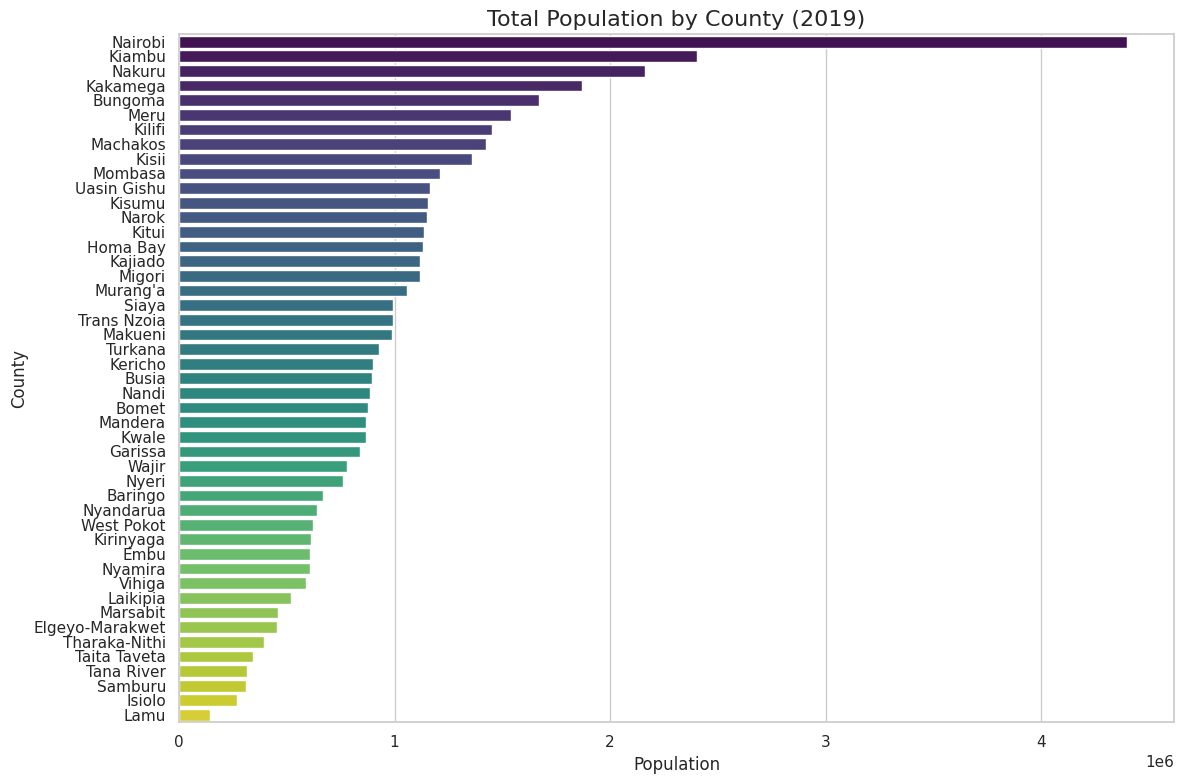

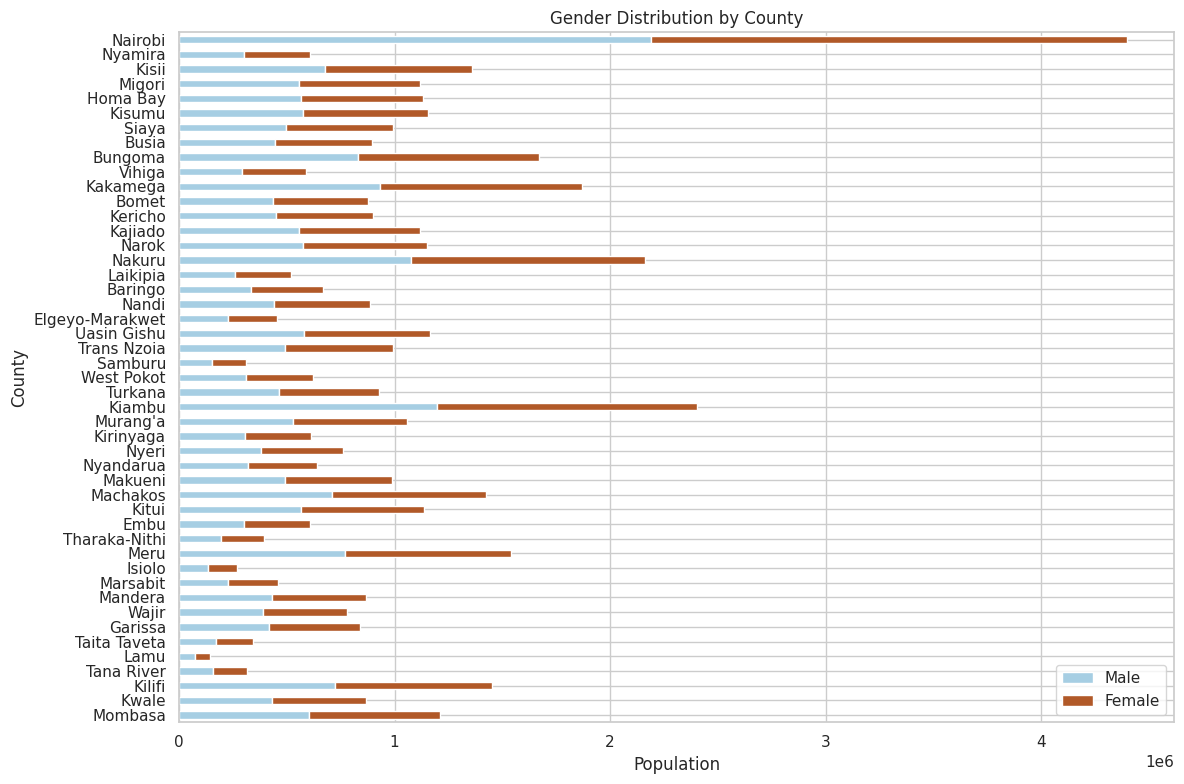

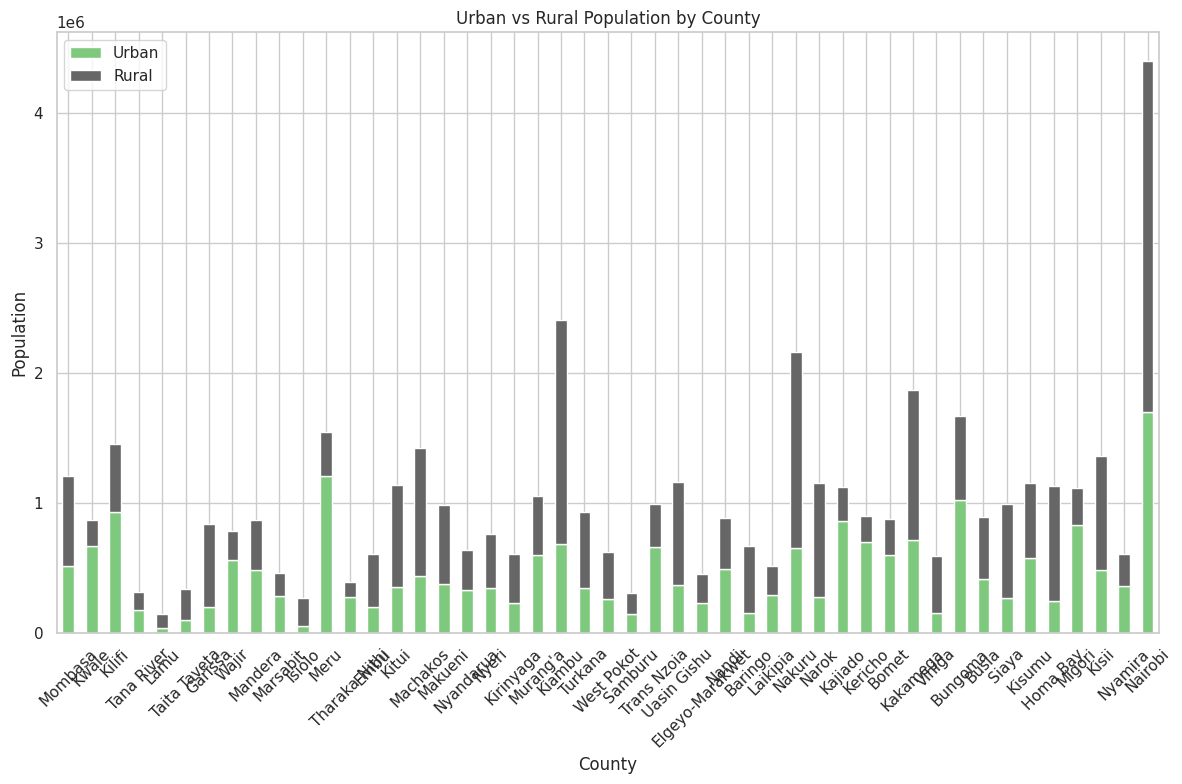

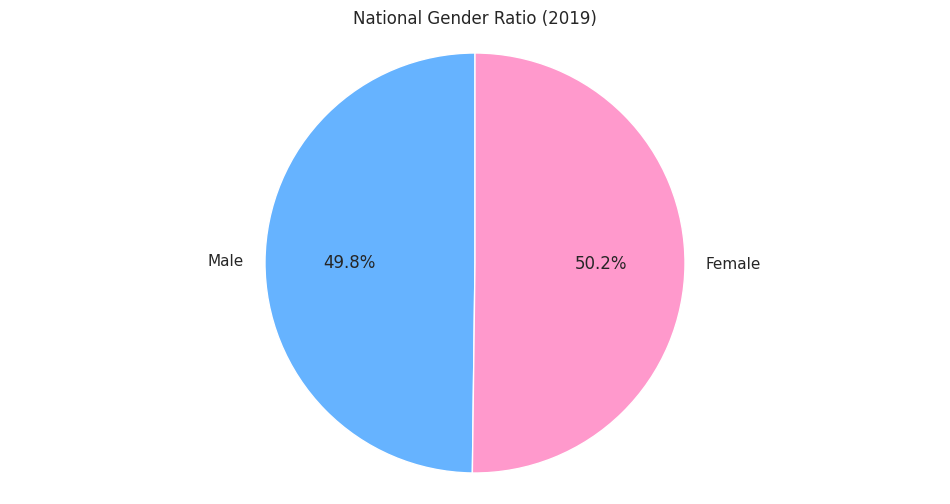

In [2]:
# ==============================
# Kenya Demographics EDA Project
#upload directly from your laptop the csv to be used
# ==============================

# 🟢 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 🟢 Step 2: Upload Dataset
print("Please upload your kenya_population_2019.csv file...")
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(list(uploaded.keys())[0])

# 🟢 Step 3: Quick Overview
print("Dataset Preview:\n")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Clean column names just in case
df.columns = df.columns.str.strip().str.replace(" ", "_").str.capitalize()

# 🟢 Step 4: Population by County
df_sorted = df.sort_values("Total_population", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Total_population", y="County", data=df_sorted, palette="viridis")
plt.title("Total Population by County (2019)", fontsize=16)
plt.xlabel("Population")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# 🟢 Step 5: Gender Distribution
df_gender = df[["County", "Male", "Female"]].set_index("County")
df_gender.plot(kind="barh", stacked=True, colormap="Paired", figsize=(12, 8))
plt.title("Gender Distribution by County")
plt.xlabel("Population")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# 🟢 Step 6: Urban vs Rural (if available)
if "Urban" in df.columns and "Rural" in df.columns:
    df_urban = df[["County", "Urban", "Rural"]].set_index("County")
    df_urban.plot(kind="bar", stacked=True, colormap="Accent", figsize=(12, 8))
    plt.title("Urban vs Rural Population by County")
    plt.ylabel("Population")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🟢 Step 7: National Gender Ratio Pie Chart
total_male = df["Male"].sum()
total_female = df["Female"].sum()

plt.pie([total_male, total_female],
        labels=["Male", "Female"],
        autopct="%1.1f%%",
        startangle=90,
        colors=["#66b3ff", "#ff99cc"])
plt.title("National Gender Ratio (2019)")
plt.axis("equal")
plt.show()
